In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load Dataset to Python Environment

In [2]:
df=pd.read_csv("C:/Users/ASUS/Desktop/DATA SCIENCE/Assignments/Assignment 5/titanic_dataset.csv",index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.shape

(891, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 2. Do all the necessary pre-processing steps

#### Filling Misiing Value in Outliers

In [7]:
for i in['Age']:
    df[i]=df[i].fillna(df[i].median())

In [8]:
df.Cabin = df.Cabin.fillna('NA')

In [9]:
df.Embarked.fillna(df.Embarked.mode(0), inplace = True)

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [11]:
df.Embarked.isna().sum()

2

####  Handling Outliers.

Text(0.5, 1.0, 'Boxplot for Age of Passengers')

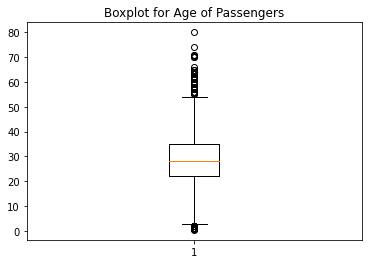

In [12]:
plt.boxplot(df['Age'])
plt.title('Boxplot for Age of Passengers')

In [13]:
Q1 = np.percentile(df['Age'],25)
Q1

22.0

In [14]:
Q3 = np.percentile(df['Age'],75)
Q3

35.0

In [15]:
IQR=Q3-Q1
IQR

13.0

In [16]:
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit

2.5

In [17]:
Upper_limit

54.5

In [18]:
outlier=[]
for x in df['Age']:
    if((x>Upper_limit)or(x<lower_limit)):
        outlier.append(x)

In [19]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [20]:
ind=(df['Age']>Upper_limit) | (df['Age']<lower_limit)
df.loc[ind].index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [21]:
df.drop([8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],inplace=True)

In [22]:
df.shape

(825, 11)

Text(0.5, 1.0, 'Boxplot for Fare of Passengers')

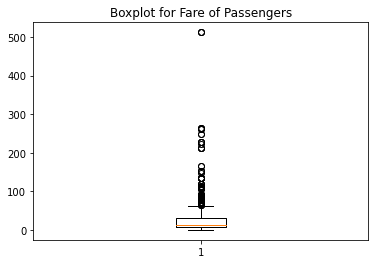

In [23]:
plt.boxplot(df['Fare'])
plt.title('Boxplot for Fare of Passengers')

In [24]:
Q1=np.percentile(df['Fare'],25)
Q1


7.8958

In [25]:
Q3=np.percentile(df['Fare'],75)
Q3

30.0708

In [26]:
IQR=Q3-Q1
IQR

22.174999999999997

In [27]:
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit

-25.366699999999994

In [28]:
Upper_limit

63.333299999999994

In [29]:
outlier1=[]
for x in df['Fare']:
    if((x>Upper_limit)or(x<lower_limit)):
        outlier1.append(x)

In [30]:
outlier1 

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [31]:
[i for i, e in enumerate(df['Fare']) if (e >Upper_limit) | (e <lower_limit)]


[1,
 23,
 27,
 29,
 47,
 55,
 56,
 66,
 81,
 88,
 93,
 108,
 109,
 113,
 128,
 140,
 147,
 164,
 183,
 196,
 199,
 205,
 211,
 225,
 235,
 236,
 237,
 241,
 247,
 266,
 267,
 274,
 280,
 281,
 284,
 285,
 292,
 293,
 298,
 299,
 305,
 307,
 309,
 310,
 313,
 340,
 344,
 346,
 348,
 351,
 355,
 359,
 362,
 381,
 404,
 413,
 421,
 447,
 449,
 456,
 458,
 464,
 465,
 480,
 487,
 496,
 499,
 503,
 508,
 514,
 515,
 537,
 541,
 546,
 564,
 570,
 580,
 593,
 595,
 604,
 608,
 613,
 626,
 628,
 635,
 643,
 645,
 653,
 661,
 675,
 682,
 686,
 687,
 698,
 702,
 706,
 708,
 721,
 730,
 733,
 743,
 760,
 771,
 782,
 785,
 791,
 798]

In [32]:
df.drop([1,
 23,
 27,
 29,
 47,
 56,
 66,
 81,
 88,
 93,
 108,
 109,
 113,
 128,
 140,
 147,
 164,
 183,
 199,
 205,
 211,
 225,
 235,
 236,
 237,
 241,
 247,
 266,
 267,
 274,
 280,
 284,
 285,
 292,
 293,
 299,
 305,
 307,
 309,
 310,
 313,
 340,
 344,
 346,
 348,
 351,
 355,
 359,
 362,
 381,
 404,
 413,
 421,
 447,
 449,
 456,
 458,
 464,
 465,
 487,
 496,
 499,
 503,
 508,
 514,
 515,
 537,
 541,
 564,
 570,
 580,
 593,
 595,
 604,
 608,
 613,
 628,
 635,
 653,
 661,
 675,
 682,
 686,
 687,
 698,
 702,
 706,
 708,
 721,
 730,
 733,
 743,
 760,
 771,
 782,
 785,
 791,
 798],inplace=True)

In [33]:
df.shape

(727, 11)

Text(0.5, 1.0, 'Boxplot for SibSp')

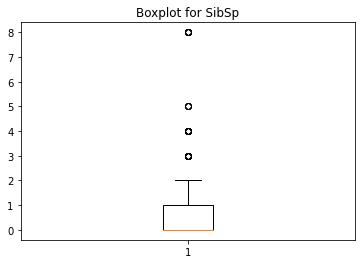

In [34]:
plt.boxplot(df['SibSp'])
plt.title('Boxplot for SibSp')

In [35]:
Q1=np.percentile(df['SibSp'],25)
Q1

0.0

In [36]:
Q3=np.percentile(df['SibSp'],75)
Q3

1.0

In [37]:
IQR=Q3-Q1
IQR

1.0

In [38]:
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit

-1.5

In [39]:
Upper_limit

2.5

In [40]:
outlier2=[]
for x in df['SibSp']:
    if((x>Upper_limit)|(x<lower_limit)):
        outlier2.append(x)

In [41]:
outlier2

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 8,
 3,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 5,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [42]:
[i for i, e in enumerate(df['SibSp']) if (e >Upper_limit) | (e <lower_limit)]


[18,
 20,
 40,
 47,
 51,
 55,
 58,
 70,
 72,
 131,
 140,
 143,
 147,
 164,
 188,
 191,
 213,
 225,
 257,
 271,
 296,
 327,
 385,
 389,
 432,
 433,
 548,
 582,
 633,
 636,
 655,
 661,
 684,
 688,
 700]

In [43]:
df.drop([18,
 20,
 40,
 51,
 58,
 70,
 72,
 131,
 143,
 188,
 191,
 213,
 257,
 271,
 296,
 385,
 389,
 432,
 433,
 548,
 582,
 633,
 636,
 655,
 684,
 688,
 700],inplace=True)

In [44]:
df.shape

(700, 11)

In [45]:
x=df.drop(['Survived'],axis=1)
y=df.Survived

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Sex']=label_encoder.fit_transform(x['Sex'])
x['Embarked']=label_encoder.fit_transform(x['Embarked'])

In [47]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,2
6,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NA,1
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NA,2
888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NA,2


In [48]:
x1=x.drop('Ticket',axis=1)

In [49]:
x1

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NA,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2
5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NA,2
6,3,"Moran, Mr. James",1,28.0,0,0,8.4583,NA,1
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,NA,2
888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,2
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,NA,2


In [50]:
x2=x1.drop('Name',axis=1)
x2

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
2,1,0,38.0,1,0,71.2833,C85,0
3,3,0,26.0,0,0,7.9250,NA,2
4,1,0,35.0,1,0,53.1000,C123,2
5,3,1,35.0,0,0,8.0500,NA,2
6,3,1,28.0,0,0,8.4583,NA,1
...,...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,NA,2
888,1,0,19.0,0,0,30.0000,B42,2
889,3,0,28.0,1,2,23.4500,NA,2


In [51]:
x3=x2.drop('Cabin',axis=1)
x3

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
6,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,28.0,1,2,23.4500,2


In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x3 = min_max.fit_transform(x3)

In [53]:
type(x3)

numpy.ndarray

In [54]:
x3=pd.DataFrame(x3)


In [55]:
type(x3)

pandas.core.frame.DataFrame

In [56]:
x3.describe()

,0,1,2,3,4,5,6
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.677857,0.644286,0.501667,0.063036,0.063810,0.061901,0.521905
std,0.407559,0.479072,0.203345,0.137597,0.138886,0.100670,0.257761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.372549,0.000000,0.000000,0.015412,0.333333
50%,1.000000,1.000000,0.490196,0.000000,0.000000,0.025374,0.666667
75%,1.000000,1.000000,0.607843,0.125000,0.000000,0.058556,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
x=x3

### 3.Create kNN and SVM models

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

### K Nearest Neighbour

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

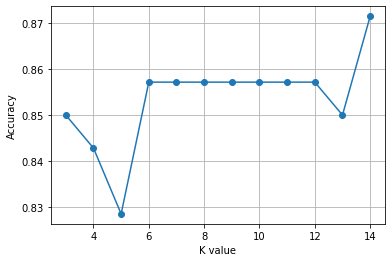

In [62]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [63]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier=classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred_knn)

0.8714285714285714

In [65]:
confusion_matrix(y_test,y_pred_knn)

array([[88,  1],
       [17, 34]], dtype=int64)

#### K-FOLD CROSS VALIDATION  with KNN Model

In [66]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [67]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 3

In [68]:
from sklearn.model_selection import cross_val_score
cv_result =cross_val_score(classifier,x,y,cv = kfold_validator)

In [69]:
cv_result

array([0.8       , 0.91428571, 0.77142857, 0.87142857, 0.78571429,
       0.84285714, 0.85714286, 0.8       , 0.87142857, 0.81428571])

In [70]:
np.mean(cv_result)

0.832857142857143

#### STRATIFIED K-FOLD CROSS VALIDATION with KNN Model


In [71]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [72]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 62  63  65  71  72  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 3

In [73]:
skcv_result = cross_val_score(classifier,x,y,cv = skfold_validator)

In [74]:
skcv_result

array([0.81428571, 0.84285714, 0.81428571, 0.88571429, 0.84285714,
       0.81428571, 0.85714286, 0.78571429, 0.85714286, 0.81428571])

In [75]:
np.mean(skcv_result)

0.8328571428571427

### SVM MODEL

In [76]:
from sklearn.svm import SVC

In [77]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [79]:
confusion_matrix(y_test,y_pred_svm)

array([[78, 11],
       [11, 40]], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred_svm)

0.8428571428571429

#### K-FOLD CROSS VALIDATION with SVM Model

In [81]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [82]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 3

In [83]:
from sklearn.model_selection import cross_val_score
cv_result =cross_val_score(svm_cls,x,y,cv = kfold_validator)

In [84]:
cv_result

array([0.82857143, 0.81428571, 0.78571429, 0.87142857, 0.7       ,
       0.78571429, 0.8       , 0.8       , 0.81428571, 0.8       ])

In [85]:
np.mean(cv_result)

0.8

#### STRATIFIED K-FOLD  CROSS VALIDATION with SVM Model

In [86]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [87]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 62  63  65  71  72  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 3

In [88]:
skcv_result = cross_val_score(svm_cls,x,y,cv = skfold_validator)

In [89]:
skcv_result

array([0.81428571, 0.81428571, 0.8       , 0.87142857, 0.77142857,
       0.74285714, 0.8       , 0.77142857, 0.81428571, 0.8       ])

In [90]:
np.mean(skcv_result)

0.8

## THANK YOU